                                    Mini Projeto de Análise de Dados

    Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.
  
    Esse exercício vai obrigar a gente a usar boa parte dos conhecimentos de pandas.
   
    O que temos?
    
    Temos os dados de 2019 de uma empresa de prestação de serviços. 
  
    - CadastroFuncionarios;
    - CadastroClientes;
    - BaseServiçosPrestados.
 
    Obs1: Para ler arquivos csv, temos o read_csv<br>
    Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

    ### O que queremos saber/fazer?

In [8]:
   
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
cadastro_clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
base_serviços_prestados = pd.read_excel('BaseServiçosPrestados.xlsx')
display(funcionarios_df)
display(cadastro_clientes_df)
display(base_serviços_prestados)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


FOLHA SALARIAL

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? 
#Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários.

In [21]:
funcionarios_df['Salário Total'] = funcionarios_df ['Salario Base'] +	funcionarios_df ['Impostos'] +	funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']	
print('Total da Folha Salarial Mensal é de R${:,}'.format(funcionarios_df['Salário Total'].sum()))

Total da Folha Salarial Mensal é de R$2,717,493.22


FATURAMENTO DA EMPRESA

2. Qual foi o faturamento da empresa?

    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos.

In [24]:
faturamentos_df = base_serviços_prestados[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(cadastro_clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
display(faturamentos_df)
print('Faturamento foi de R${:,}'.format(sum(faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal'])))
   

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


Faturamento foi de R$5,519,160


PERCENTUAL DE FUNCIONÁRIOS QUE FECHARAM CONTRATO

3. Qual o % de funcionários que já fechou algum contrato?
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
    Na base de funcionários temos uma lista com todos os funcionários;
    Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais;
    Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez;
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna;
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA;

In [27]:
qtde_funcionarios_fecharam = len(base_serviços_prestados['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios_df['ID Funcionário'])
print('Percentual foi de {:.2%}.'.format(qtde_funcionarios_fecharam / qtde_funcionarios_totais))

Percentual foi de 86.84%.


TOTAL DE CONTRATOS FECHADOS POR ÁREA

4. Calcule o total de contratos que cada área da empresa já fechou.

,ID Funcionário,Area
0,67,Financeiro
1,17,Logística
2,116,Logística
3,37,Financeiro
4,130,Comercial
...,...,...
232,111,Operações
233,124,Comercial
234,72,Logística
235,90,Administrativo


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

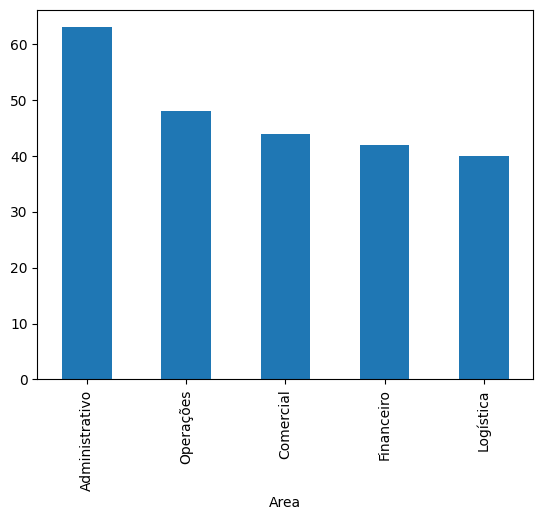

In [31]:
contratos_area_df = base_serviços_prestados[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']])
display(contratos_area_df)
qtde_contratos_area = contratos_area_df['Area'].value_counts()
print(qtde_contratos_area)
qtde_contratos_area.plot(kind='bar')

TOTAL DE FUNCIONÁRIOS POR ÁREA

5. Calcule o total de funcionários por área.

TICKET MÉDIO MENSAL DOS CONTRATOS

6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean();
   
    Obs: Lembrando as opções mais usuais de encoding:

    encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'.
    Observação Importante, se o seu código der um erro na hora de importar os arquivos:

  
  CadastroClientes.csv;
  CadastroFuncionarios.csv.
    
  Use separador sep=";" (ponto e vírgula) para resolver. 